### 1.- Post-angiogenesis tumor growth for distinct blood vessel networks (network analysis)

In this test we obtain the max. entropy of the tumor observed after letting it grow with different blood vessel networks. 

High entropy values correspond to cases where the tumor grew more, i.e. "stronger" networks.

In [1]:
#Tumor model imports 
from TumorModel import Tissue
from TumorModel import Therapy
from TumorModel import TherapyType
from TumorModel import CellType

#Angiogenesis model imports 
from AngiogenesisModel import AngiogenesisModel
from BloodVesselGraph import BloodVesselGraph
from BloodVesselGraph import AutomatonToGraph

#Other utilities 
from ImageEntropyCalculator import ImageEntropyCalculator
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tikzplotlib
import csv

In [14]:
srcPath = "bloodvessel_objects/"
nNetworks = 100
tumorPath = "tumor_instance.pkl"
automatonWidth = 150 
automatonHeight = 150

tumorEvolutionSteps = 100
entropyCalculator = ImageEntropyCalculator()
maxEntropyValues = []
maxEntropyValue = 0

for i in range(0, nNetworks):
    
    print("Analyzing network: "+str(i + 1))
    print("Max. entropy value: "+str(maxEntropyValue))
    completePath = srcPath + "network_" +str(i)+".pkl"
    
    #Open the evolved tumor template
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(tumorPath)
    
    #Open the network
    bloodVesselNet = AngiogenesisModel(automatonWidth, automatonHeight)
    bloodVesselNet = bloodVesselNet.openBloodVesselNetworkInstance(completePath)
    
    #Set the blood vessel positions in the tumor automaton
    bloodVesselPositions = bloodVesselNet.occupiedCells
    tumor.initializeNutrientWithBloodVessels(bloodVesselPositions)
    
    #Continue the tumor evolution
    tumor.continueTissueEvolutionWithMovie(tumorEvolutionSteps, False)
    
    #Obtain the max entropy of tumor after angiogenesis
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(300, 300 + tumorEvolutionSteps)]
    maxEntropyValue = np.max(entropyTimeSeries)
    maxEntropyValues.append(maxEntropyValue)
    
    clear_output(wait = True)

Analyzing network: 100
Max. entropy value: 0.8694747576775657


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


In [82]:
#Open the metric averages for networks.
def readCSVColumn(path, colNum):
    colData = []
    
    with open(path, 'r') as file:
        csvreader = csv.reader(file)
        i = 0
        for row in csvreader:
            if(i > 0):
                colData.append(float(row[colNum]))
            i = i + 1
    
    return colData

In [83]:
averageMetricsPath = "network_metrics/metrics.csv"
averageDegrees = readCSVColumn(averageMetricsPath, 1)
averageBetweenness = readCSVColumn(averageMetricsPath, 2)
averagePageRanks = readCSVColumn(averageMetricsPath, 3)
averageClusteringCoefficients = readCSVColumn(averageMetricsPath,4)

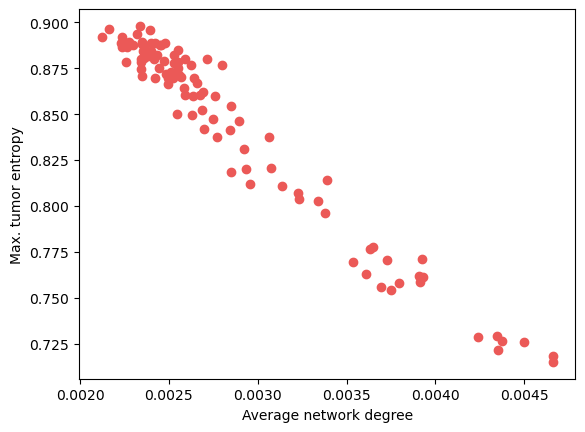

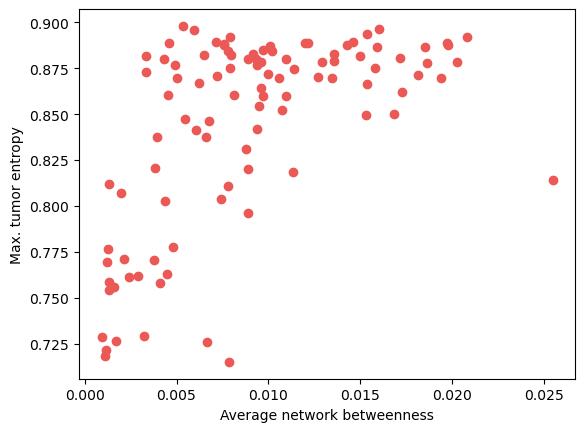

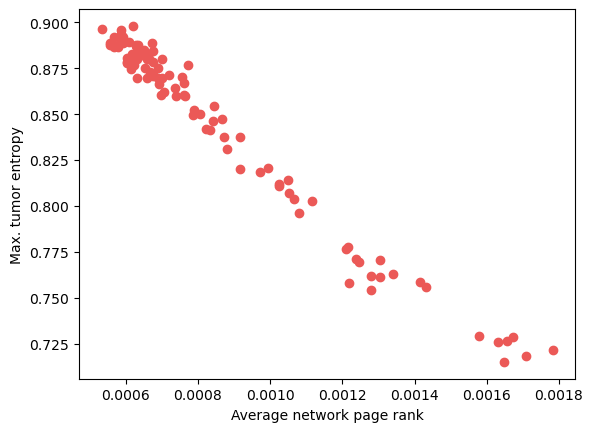

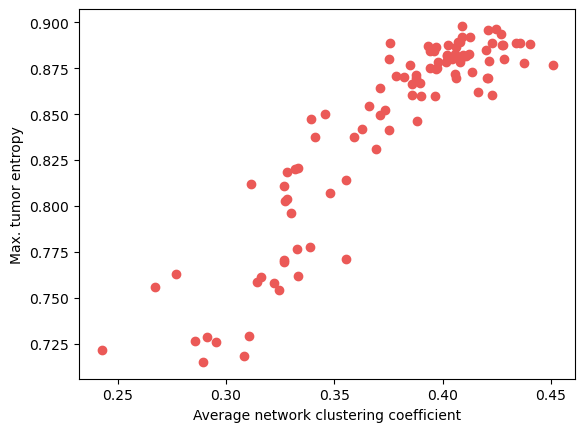

In [18]:
#We will generate each plot independently. i want to arrange them in latex using subfigures
exportTikzPath = "tikz_graphs"

plt.figure()
plt.plot(averageDegrees, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network degree")
plt.ylabel("Max. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_degrees_non_treatment.tex")

plt.figure()
plt.plot(averageBetweenness, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network betweenness")
plt.ylabel("Max. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_betweenness_non_treatment.tex")

plt.figure()
plt.plot(averagePageRanks, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network page rank")
plt.ylabel("Max. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_page_rank_non_treatment.tex")

plt.figure()
plt.plot(averageClusteringCoefficients, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network clustering coefficient")
plt.ylabel("Max. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_clustering_coefficient_non_treatment.tex")

### 2.- Post-angiogenesis growth when radiotherapy is applied (network analysis)

In this case we will obtain the minimum entropy value obtained after applying the therapy for each of the networks. 

Small min entropy values correspond to cases where the therapy is acting more effectively on the tumor. 


In [79]:
#Define the therapy 

startDay = 301
g0Gamma = 0.05
alpha = 0.1
beta = 0.05
cycleTime = 4
dose = 1
thresholdOxygen = 0.35
delayTime = 50
initMitoticProb = 0.2
finalMitoticProb = 0.5

radiotherapy = Therapy(TherapyType.RADIOTHERAPY, startDay, g0Gamma, alpha, beta, cycleTime, dose, thresholdOxygen, delayTime, initMitoticProb, finalMitoticProb)

In [80]:
srcPath = "bloodvessel_objects/"
nNetworks = 100
tumorPath = "tumor_instance.pkl"
automatonWidth = 150 
automatonHeight = 150

tumorEvolutionSteps = 300
entropyCalculator = ImageEntropyCalculator()
minEntropyValues = []
minEntropyValue = 0

for i in range(0, nNetworks):
    
    print("Analyzing network: "+str(i + 1))
    print("Min. entropy value: "+str(minEntropyValue))
    completePath = srcPath + "network_" +str(i)+".pkl"
    
    #Open the evolved tumor template
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(tumorPath)
    
    #Open the network
    bloodVesselNet = AngiogenesisModel(automatonWidth, automatonHeight)
    bloodVesselNet = bloodVesselNet.openBloodVesselNetworkInstance(completePath)
    
    #Set the blood vessel positions in the tumor automaton
    bloodVesselPositions = bloodVesselNet.occupiedCells
    tumor.initializeNutrientWithBloodVessels(bloodVesselPositions)
    
    #Add the therapy
    tumor.addTherapy(radiotherapy)
    
    #Continue the tumor evolution
    tumor.continueTissueEvolutionWithMovie(tumorEvolutionSteps, False)
    
    #Obtain the max entropy of tumor after angiogenesis
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(301, 300 + tumorEvolutionSteps)]
    minEntropyValue = np.min(entropyTimeSeries)
    minEntropyValues.append(minEntropyValue)
    
    clear_output(wait = True)

Analyzing network: 100
Min. entropy value: 0.706686619083496


100%|█████████████████████████████████████████| 300/300 [00:40<00:00,  7.34it/s]


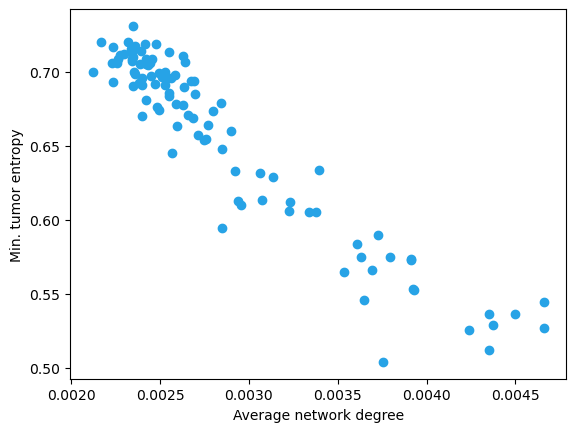

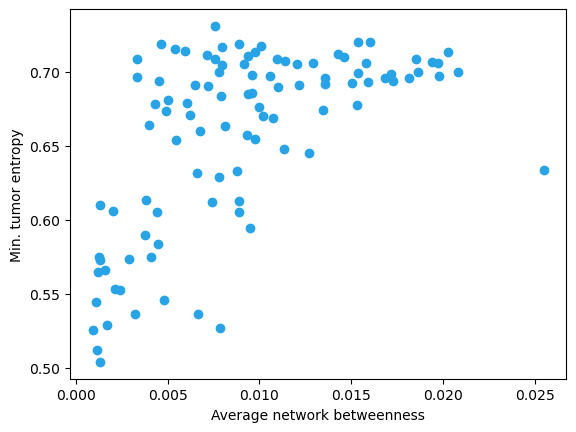

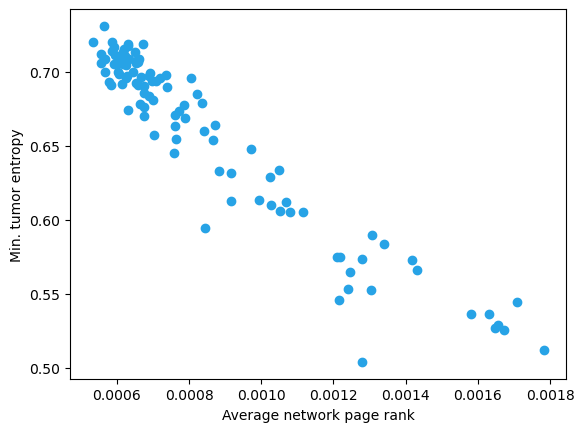

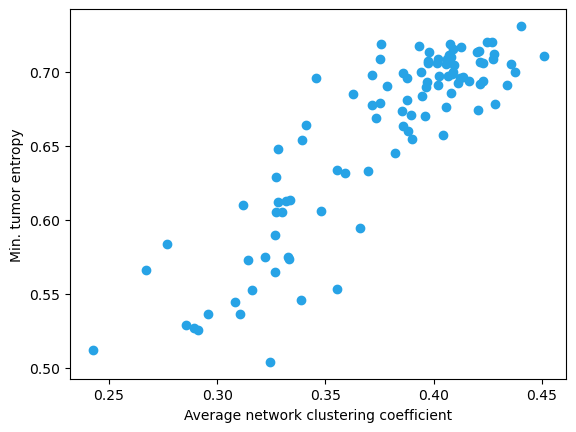

In [84]:
exportTikzPath = "tikz_graphs"

plt.figure()
plt.plot(averageDegrees, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network degree")
plt.ylabel("Min. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_degrees_treatment.tex")

plt.figure()
plt.plot(averageBetweenness, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network betweenness")
plt.ylabel("Min. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_betweenness_treatment.tex")

plt.figure()
plt.plot(averagePageRanks, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network page rank")
plt.ylabel("Min. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_page_rank_treatment.tex")

plt.figure()
plt.plot(averageClusteringCoefficients, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network clustering coefficient")
plt.ylabel("Min. tumor entropy")
tikzplotlib.save(exportTikzPath + "/average_clustering_coefficient_treatment.tex")

### 3.- Angiogenesis treatment of specific nodes test

In [85]:
#Network that we will treat
networkToTreat = 99
networkPath = "bloodvessel_objects/" + "network_"+str(networkToTreat)+".pkl"
networkMetricsSrc = "network_metrics/"+"network_"+str(networkToTreat)+".csv"
maxEntropyValues = []
nAttackedNodes = 10

automatonWidth = 150
automatonHeight = 150

entropyCalculator = ImageEntropyCalculator()
tumorPath = "tumor_instance.pkl"

#Open the tumor and register the proliferating positions
tumor = Tissue(automatonWidth, automatonHeight)
tumor = tumor.importTumorInstance(tumorPath)

tumorEvolutionSteps = 300

proliferatingPositions = np.zeros((automatonHeight, automatonWidth))
tumorSlices = tumor.evolutionMovie
finalSlice = tumorSlices[:,:,:,-1]
for i in range(0,automatonHeight):
    for j in range(0,automatonWidth):
        if((finalSlice[i,j,:] == CellType.PROLIFERATING.value).all()):
            proliferatingPositions[i,j] = 1

for i in range(0,8):
    
    #Open the tumor
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(tumorPath)
    
    #Open the network
    bloodVesselAutomaton = AngiogenesisModel(automatonWidth, automatonHeight)
    bloodVesselAutomaton = bloodVesselAutomaton.openBloodVesselNetworkInstance(networkPath)
    bloodVesselPositions = bloodVesselAutomaton.occupiedCells
    
    #Turn it into a graph
    automatonTransformer = AutomatonToGraph()
    bloodVesselGraph = automatonTransformer.convertAutomatonToGraphWithTumor(bloodVesselPositions, proliferatingPositions)
    
    #Design the therapy using the nodes to target
    nodeNumbersToTarget = readCSVColumn(networkMetricsSrc, i)
    nodeNumbersToTarget = nodeNumbersToTarget[0:nAttackedNodes]
    
    
    locationsToTreat = np.zeros((automatonHeight, automatonWidth))
    for j in range(0,len(nodeNumbersToTarget)):
        nodeIndex = nodeNumbersToTarget[j]
        node = bloodVesselGraph.nodes[int(nodeIndex)]
        automatonIndex1 = node.automatonIndex1
        automatonIndex2 = node.automatonIndex2
        locationsToTreat[automatonIndex1, automatonIndex2] = 1
        
    
    startDay = 301
    vesselKillThreshold = 0.065
    potentialConstant = 1
    sourceAmplification = 2
    stepDeathProbability = 0.1
    
    angioTherapy = Therapy(TherapyType.ANGIOTHERAPY, startDay, locationsToTreat, vesselKillThreshold, potentialConstant, sourceAmplification, stepDeathProbability)
    
    tumor.initializeNutrientWithBloodVessels(bloodVesselPositions)
    tumor.addTherapy(angioTherapy)
    tumor.continueTissueEvolutionWithMovie(tumorEvolutionSteps, False)
    
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(301, 300 + tumorEvolutionSteps)]
    maxEntropyValue = np.min(entropyTimeSeries)
    maxEntropyValues.append(maxEntropyValue)
    
    clear_output(wait = True)



100%|█████████████████████████████████████████| 300/300 [00:42<00:00,  7.12it/s]


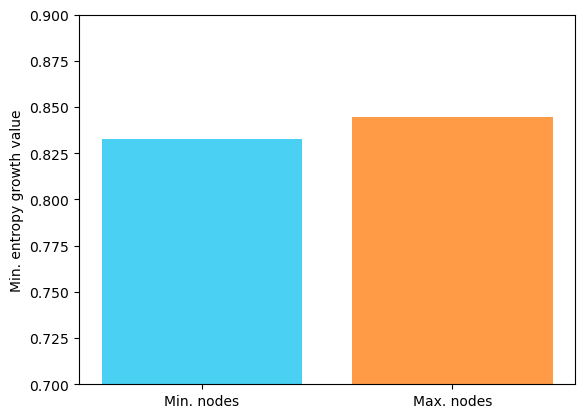

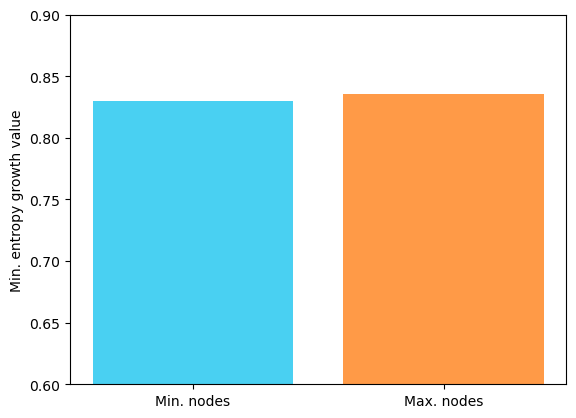

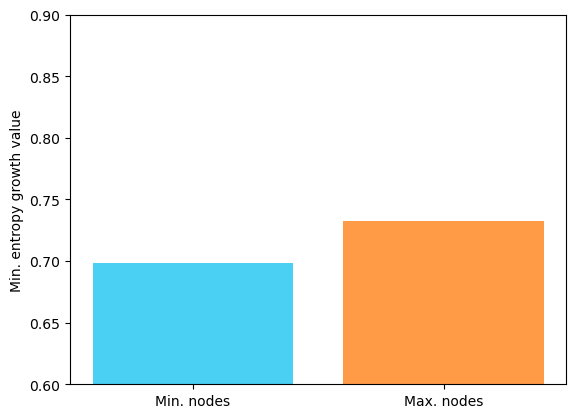

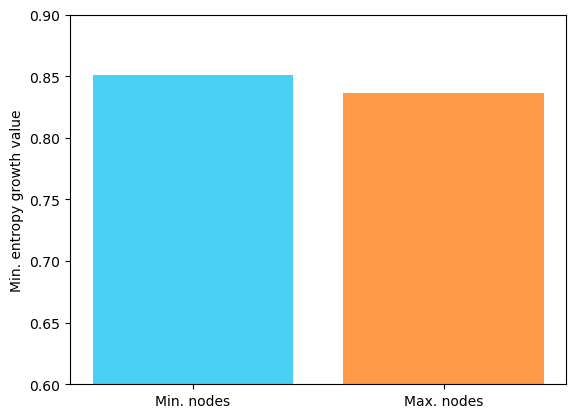

In [72]:
minNodesColor = "#49d0f2"
maxNodesColor = "#ff9a47"
exportTikzPath = "tikz_graphs"

colors = [minNodesColor, maxNodesColor]

#Average degree
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [maxEntropyValues[0], maxEntropyValues[4]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.ylim([0.7,0.9])
tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_degree.tikz")


#Average betweenness

plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [maxEntropyValues[1], maxEntropyValues[5]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.ylim([0.7,0.9])
tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_betweenness.tikz")


#Average page rank
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [maxEntropyValues[2], maxEntropyValues[6]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.ylim([0.7,0.9])
tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_page_rank.tikz")


#Average clustering
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [maxEntropyValues[3], maxEntropyValues[7]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.ylim([0.7,0.9])
tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_clustering_coeff.tikz")

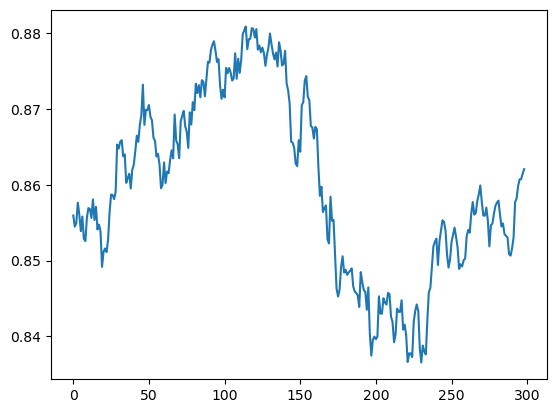

In [73]:
plt.plot(entropyTimeSeries)

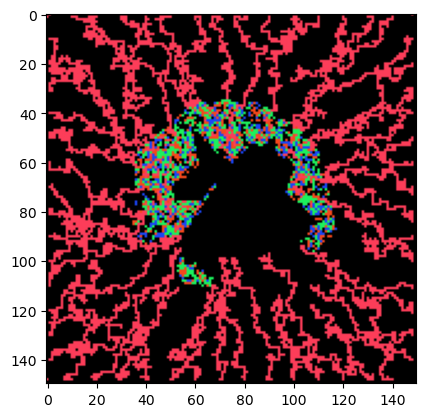

In [74]:
plt.imshow(tumor.getPicture(False))

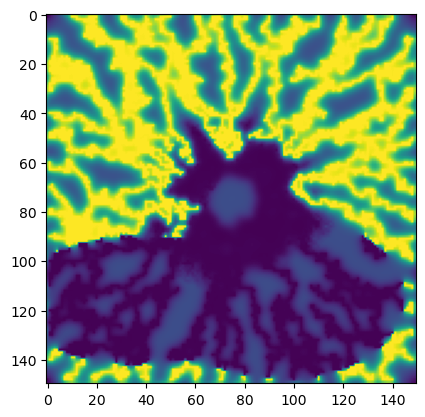

In [75]:
plt.imshow(tumor.nutrient.nutrientConcentration)

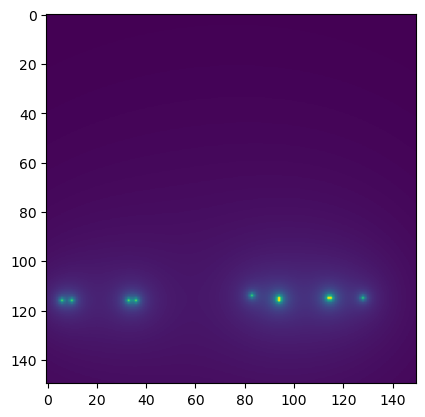

In [76]:
plt.imshow(tumor.therapies[0].vesselKillPotential)